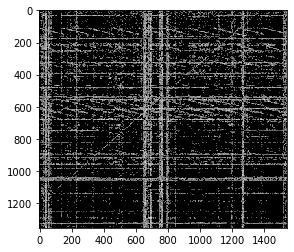

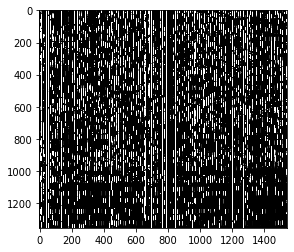

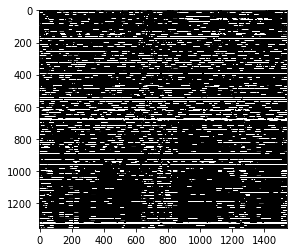

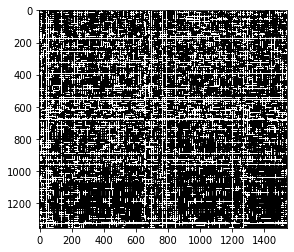

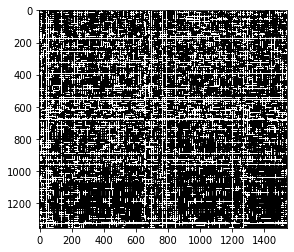

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from scipy import ndimage

def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.2989, 0.5870, 0.1140])
%matplotlib inline

img = mpimg.imread('messIono.png')     
gray = rgb2gray(img)  

fin = []
for row in gray:
    toa = []
    for val in row:
        if val<0.3:
            toa.append(0)
        else:
            toa.append(val)
    fin.append(toa)
gray = fin

filt = [[-1, 2, -1], [-1, 2, -1], [-1, 2, -1], [-1, 2, -1], [-1, 2, -1], [-1, 2, -1], [-1, 2, -1], [-1, 2, -1], [-1, 2, -1], [-1, 2, -1], [-1, 2, -1], [-1, 2, -1], [-1, 2, -1], [-1, 2, -1], [-1, 2, -1], [-1, 2, -1], [-1, 2, -1], [-1, 2, -1], [-1, 2, -1], [-1, 2, -1], [-1, 2, -1], [-1, 2, -1], [-1, 2, -1], [-1, 2, -1], [-1, 2, -1], [-1, 2, -1], [-1, 2, -1]]
convolved_image = ndimage.convolve(gray, filt, mode='constant', cval=0.0)

filt = [[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1]]
convolved_horz_image = ndimage.convolve(gray, filt, mode='constant', cval=0.0)


plt.imshow(gray, cmap=plt.get_cmap('gray'), vmin=0, vmax=1)
plt.show()

plt.imshow(convolved_image, cmap=plt.get_cmap('gray'), vmin=0, vmax=1)
plt.show()

plt.imshow(convolved_horz_image, cmap=plt.get_cmap('gray'), vmin=0, vmax=1)
plt.show()

tot = np.add(convolved_image, convolved_horz_image)
plt.imshow(tot, cmap=plt.get_cmap('gray'), vmin=0, vmax=1)
plt.show()

tot = np.subtract(gray, tot)
fin = np.subtract(gray, tot)
plt.imshow(fin, cmap=plt.get_cmap('gray'), vmin=0, vmax=1)
plt.show()

In [4]:
gray.shape

AttributeError: 'list' object has no attribute 'shape'

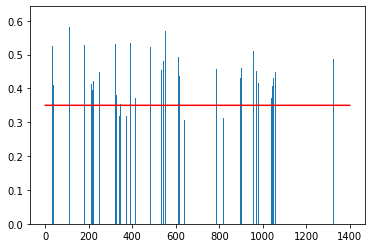

In [5]:
verts = []

for row in gray:
    verts.append(np.median(row))
    
plt.bar(np.arange(len(verts)), verts)
plt.plot(range(0, 1400), [0.35 for i in range(0, 1400)], color="red")

In [6]:
 # plt.hist(verts, bins=30)

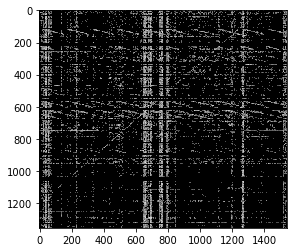

In [7]:
bleached_horizontal = []
count = 0
for row in gray:
    if verts[count] > 0.2:
        bleached_horizontal.append([0 for i in range(0, len(row))])
    else:
        bleached_horizontal.append(row)
    count += 1

plt.imshow(bleached_horizontal, cmap=plt.get_cmap('gray'), vmin=0, vmax=1)
plt.show()

In [8]:
np.asarray(bleached_horizontal).transpose().shape

(1542, 1354)

In [9]:
rotated_image = np.asarray(bleached_horizontal).transpose()

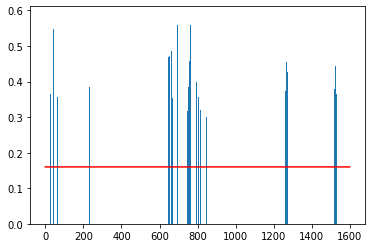

In [10]:
hots = []

for row in rotated_image:
    hots.append(np.median(row))
    
plt.bar(np.arange(len(hots)), hots)
plt.plot(range(0, 1600), [0.16 for i in range(0, 1600)], color="red")

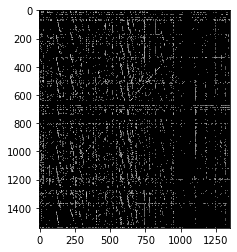

In [11]:
bleached_vertical = []
count = 0
for row in rotated_image:
    if hots[count] > 0.12:
        bleached_vertical.append([0 for i in range(0, len(row))])
    else:
        bleached_vertical.append(row)
    count += 1

plt.imshow(bleached_vertical, cmap=plt.get_cmap('gray'), vmin=0, vmax=1)
plt.show()

In [12]:
from scipy import ndimage

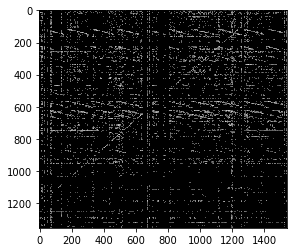

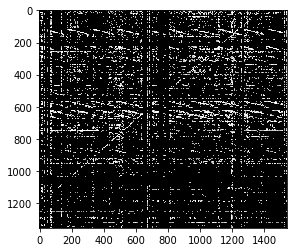

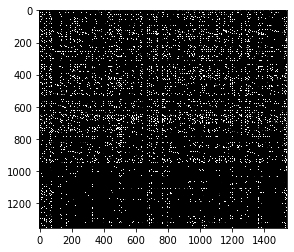

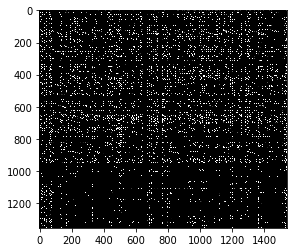

In [28]:
filt = [[0, 0, 0], [0, 2, 0], [0, 0, 0]]
convolved_image = ndimage.convolve(bleached_vertical, filt).transpose()


filt = [[4, 4, -4, -4], [4, 4, -4, -4], [-4, -4, 4, 4], [-4, -4, 4, 4]]
fin = ndimage.convolve(bleached_vertical, filt).transpose()

plt.imshow(np.asarray(bleached_vertical).transpose(), cmap=plt.get_cmap('gray'), vmin=0, vmax=1)
plt.show()

plt.imshow(convolved_image, cmap=plt.get_cmap('gray'), vmin=0, vmax=1)
plt.show()

plt.imshow(fin, cmap=plt.get_cmap('gray'), vmin=0, vmax=1)
plt.show()


tota = []
fir = 0
for row in np.asarray(bleached_vertical).transpose():
    mila = []
    sec = 0
    for val in row:
        if (fin[fir][sec] - val) < 0:
            mila.append(0)
        else:
            mila.append( fin[fir][sec] - val)
        sec += 1
    tota.append(mila)
    fir += 1
    
plt.imshow(tota, cmap=plt.get_cmap('gray'), vmin=0, vmax=1)
plt.show()